In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
confirmed_data = pd.read_csv("covid_confirmed.csv")
death_data = pd.read_csv("covid_deaths.csv")

In [3]:
confirmed_data.head(5)
death_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4


In [4]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74


In [5]:
confirmed_data["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [6]:
confirmed_data["Province/State"] = confirmed_data["Province/State"].fillna("")
death_data['Province/State'] = death_data['Province/State'].fillna("")
confirmed_data.head(10)
death_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
5,,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,393,403,416,433,445,452,467,484,500,508
7,,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,64,67,70,74,77,81,87,91,98,113
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,47,47,48,48,48,48,48,48,48,48


In [7]:
confirmed_data['State, Country'] = confirmed_data[['Province/State', 'Country/Region']].apply(lambda x: '-'.join(x), axis=1)
death_data['State, Country'] = death_data[['Province/State', 'Country/Region']].apply(lambda x: '-'.join(x), axis=1)
death_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,"State, Country"
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,-Afghanistan
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,-Albania
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,-Algeria
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,-Andorra
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,-Angola
5,,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,-Antigua and Barbuda
6,,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,403,416,433,445,452,467,484,500,508,-Argentina
7,,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,67,70,74,77,81,87,91,98,113,-Armenia
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,Australian Capital Territory-Australia
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,47,48,48,48,48,48,48,48,48,New South Wales-Australia


In [8]:
death_data = death_data.drop(['Province/State', 'Country/Region'], axis=1)
confirmed_data = confirmed_data.drop(['Province/State', 'Country/Region'], axis=1)
death_data.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,"State, Country"
0,33.0000,65.0000,0,0,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,-Afghanistan
1,41.1533,20.1683,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,-Albania
2,28.0339,1.6596,0,0,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,-Algeria
3,42.5063,1.5218,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,-Andorra
4,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,-Angola
5,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,-Antigua and Barbuda
6,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,403,416,433,445,452,467,484,500,508,-Argentina
7,40.0691,45.0382,0,0,0,0,0,0,0,0,...,67,70,74,77,81,87,91,98,113,-Armenia
8,-35.4735,149.0124,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,Australian Capital Territory-Australia
9,-33.8688,151.2093,0,0,0,0,0,0,0,0,...,47,48,48,48,48,48,48,48,48,New South Wales-Australia


In [9]:
death_data = death_data.set_index('State, Country')
confirmed_data = confirmed_data.set_index('State, Country')

In [10]:
death_data.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
"State, Country",,,,,,,,,,,,,,,,,,,,,
-Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,178,187,193,205,216,218,219,220,227,235
-Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,31,31,31,31,31,32,32,33,33,33
-Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,561,568,575,582,592,600,609,617,623,630
-Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
-Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
-Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
-Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,393,403,416,433,445,452,467,484,500,508
-Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,...,64,67,70,74,77,81,87,91,98,113
Australian Capital Territory-Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


In [11]:
confirmed_data.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20
"State, Country",,,,,,,,,,,,,,,,,,,,,
-Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
-Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,949,964,969,981,989,998,1004,1029,1050,1076
-Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
-Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,761,762,762,762,762,762,763,763,763,763
-Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,52,52,58,60,61,69,70,70,71,74
-Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
-Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702
-Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,...,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216
Australian Capital Territory-Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107


In [12]:
confirmed_data.T

"State, Country",-Afghanistan,-Albania,-Algeria,-Andorra,-Angola,-Antigua and Barbuda,-Argentina,-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,...,-Malawi,Falkland Islands (Malvinas)-United Kingdom,Saint Pierre and Miquelon-France,-South Sudan,-Western Sahara,-Sao Tome and Principe,-Yemen,-Comoros,-Tajikistan,-Lesotho
Lat,33.0,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-13.254308,-51.7963,46.8852,6.877,24.2155,0.186360,15.552727,-11.6455,38.861034,-29.609988
Long,65.0,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,34.301525,-59.5236,-56.3159,31.307,-12.8858,6.613081,48.516388,43.3333,71.276093,28.233608
1/22/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/23/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/24/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/25/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/26/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/27/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/28/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
1/29/20,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,...,0.000000,0.0000,0.0000,0.000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000


In [13]:
Lat1 = 30.5928/(180/math.pi)
Long1 = 114.3055/(180/math.pi)
Lat2 = confirmed_data['Lat']
Long2 = confirmed_data['Long']

In [14]:
print(Long2.dtypes)
print(type(Lat1))

float64
<class 'float'>


In [15]:
confirmed_data['Distance from Wuhan'] = 3963.0 * np.arccos((np.sin(Lat1)*np.sin(Lat2)) + np.cos(Lat1)*np.cos(Lat2)*np.cos(Long2 - Long1))
death_data['Distance from Wuhan'] = 3963.0 * np.arccos((np.sin(Lat1)*np.sin(Lat2)) + np.cos(Lat1)*np.cos(Lat2)*np.cos(Long2 - Long1))

In [16]:
confirmed_data.head(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance from Wuhan
"State, Country",,,,,,,,,,,,,,,,,,,,,
-Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,4160.878100
-Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,9869.276834
-Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9125.498645
-Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,8004.697489
-Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,4919.080767


In [17]:
death_data.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,Distance from Wuhan
"State, Country",,,,,,,,,,,,,,,,,,,,,
-Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,4160.878100
-Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,9869.276834
-Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,9125.498645
-Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,8004.697489
-Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4919.080767
-Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,8793.694094
-Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,...,403,416,433,445,452,467,484,500,508,11085.550612
-Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,...,67,70,74,77,81,87,91,98,113,6262.654122
Australian Capital Territory-Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,2380.497247


In [18]:
death_data.T.dtypes

State, Country
-Afghanistan                                    float64
-Albania                                        float64
-Algeria                                        float64
-Andorra                                        float64
-Angola                                         float64
-Antigua and Barbuda                            float64
-Argentina                                      float64
-Armenia                                        float64
Australian Capital Territory-Australia          float64
New South Wales-Australia                       float64
Northern Territory-Australia                    float64
Queensland-Australia                            float64
South Australia-Australia                       float64
Tasmania-Australia                              float64
Victoria-Australia                              float64
Western Australia-Australia                     float64
-Austria                                        float64
-Azerbaijan                      

In [19]:
death_data.head(5)
#death_data.set_index('State, Country')
death_data.index

Index(['-Afghanistan', '-Albania', '-Algeria', '-Andorra', '-Angola',
       '-Antigua and Barbuda', '-Argentina', '-Armenia',
       'Australian Capital Territory-Australia', 'New South Wales-Australia',
       ...
       '-Malawi', 'Falkland Islands (Malvinas)-United Kingdom',
       'Saint Pierre and Miquelon-France', '-South Sudan', '-Western Sahara',
       '-Sao Tome and Principe', '-Yemen', '-Comoros', '-Tajikistan',
       '-Lesotho'],
      dtype='object', name='State, Country', length=266)

In [20]:
test_df = pd.DataFrame(death_data.loc['-Afghanistan'])
test_df.head()
type(test_df)

pandas.core.frame.DataFrame

In [21]:
test_df['Country'] = 'Afghanistan'

In [22]:
test_df

,-Afghanistan,Country
Lat,33.0000,Afghanistan
Long,65.0000,Afghanistan
1/22/20,0.0000,Afghanistan
1/23/20,0.0000,Afghanistan
1/24/20,0.0000,Afghanistan
1/25/20,0.0000,Afghanistan
1/26/20,0.0000,Afghanistan
1/27/20,0.0000,Afghanistan
1/28/20,0.0000,Afghanistan
1/29/20,0.0000,Afghanistan


In [23]:
print(death_data.head())
print(confirmed_data.head())

                    Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
State, Country                                                                  
-Afghanistan    33.0000  65.0000        0        0        0        0        0   
-Albania        41.1533  20.1683        0        0        0        0        0   
-Algeria        28.0339   1.6596        0        0        0        0        0   
-Andorra        42.5063   1.5218        0        0        0        0        0   
-Angola        -11.2027  17.8739        0        0        0        0        0   

                1/27/20  1/28/20  1/29/20  ...  5/20/20  5/21/20  5/22/20  \
State, Country                             ...                              
-Afghanistan          0        0        0  ...      187      193      205   
-Albania              0        0        0  ...       31       31       31   
-Algeria              0        0        0  ...      568      575      582   
-Andorra              0        0        0  ... 

In [24]:
death_data.shape
death_data = death_data.T
confirmed_data = confirmed_data.T

In [25]:
print(death_data.head())
print(death_data.iloc[0])

State, Country  -Afghanistan  -Albania  -Algeria  -Andorra  -Angola  \
Lat                     33.0   41.1533   28.0339   42.5063 -11.2027   
Long                    65.0   20.1683    1.6596    1.5218  17.8739   
1/22/20                  0.0    0.0000    0.0000    0.0000   0.0000   
1/23/20                  0.0    0.0000    0.0000    0.0000   0.0000   
1/24/20                  0.0    0.0000    0.0000    0.0000   0.0000   

State, Country  -Antigua and Barbuda  -Argentina  -Armenia  \
Lat                          17.0608    -38.4161   40.0691   
Long                        -61.7964    -63.6167   45.0382   
1/22/20                       0.0000      0.0000    0.0000   
1/23/20                       0.0000      0.0000    0.0000   
1/24/20                       0.0000      0.0000    0.0000   

State, Country  Australian Capital Territory-Australia  \
Lat                                           -35.4735   
Long                                          149.0124   
1/22/20                   

In [26]:
iter_death_df = death_data.drop(['Lat', 'Long'])
iter_death_df

"State, Country",-Afghanistan,-Albania,-Algeria,-Andorra,-Angola,-Antigua and Barbuda,-Argentina,-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,...,-Malawi,Falkland Islands (Malvinas)-United Kingdom,Saint Pierre and Miquelon-France,-South Sudan,-Western Sahara,-Sao Tome and Principe,-Yemen,-Comoros,-Tajikistan,-Lesotho
1/22/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/23/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/24/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/25/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/26/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/27/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/28/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/29/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/30/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1/31/20,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


In [27]:
print(death_data.index)
print(type(death_data.index))

Index(['Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20',
       ...
       '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20',
       '5/26/20', '5/27/20', '5/28/20', 'Distance from Wuhan'],
      dtype='object', length=131)
<class 'pandas.core.indexes.base.Index'>


In [28]:
iter_death_df = iter_death_df.drop(['Distance from Wuhan'])

In [29]:
iter_death_df.iloc[0:5,1]

1/22/20    0.0
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
Name: -Albania, dtype: float64

In [30]:
iter_death_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)

In [31]:
iter_death_df.index.inferred_type
type(iter_death_df.index)
len(iter_death_df.index)
iter_death_df.index[0]

'1/22/20'

In [32]:
iter_death_df.iloc[:,0]
test_initial_df = iter_death_df.iloc[:,0]
print("Here is the initialized df: \n", test_initial_df)

Here is the initialized df: 
 1/22/20      0.0
1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      0.0
1/27/20      0.0
1/28/20      0.0
1/29/20      0.0
1/30/20      0.0
1/31/20      0.0
2/1/20       0.0
2/2/20       0.0
2/3/20       0.0
2/4/20       0.0
2/5/20       0.0
2/6/20       0.0
2/7/20       0.0
2/8/20       0.0
2/9/20       0.0
2/10/20      0.0
2/11/20      0.0
2/12/20      0.0
2/13/20      0.0
2/14/20      0.0
2/15/20      0.0
2/16/20      0.0
2/17/20      0.0
2/18/20      0.0
2/19/20      0.0
2/20/20      0.0
           ...  
4/29/20     60.0
4/30/20     64.0
5/1/20      68.0
5/2/20      72.0
5/3/20      85.0
5/4/20      90.0
5/5/20      95.0
5/6/20     104.0
5/7/20     106.0
5/8/20     109.0
5/9/20     115.0
5/10/20    120.0
5/11/20    122.0
5/12/20    127.0
5/13/20    132.0
5/14/20    136.0
5/15/20    153.0
5/16/20    168.0
5/17/20    169.0
5/18/20    173.0
5/19/20    178.0
5/20/20    187.0
5/21/20    193.0
5/22/20    205.0
5/23/20    216.0
5/24/20    218.0
5

In [33]:
iter_death_df.shape
death_data.shape


(131, 266)

In [34]:
test_df.columns[0]
iter_death_df.head()
iter_death_df.iloc[:, 5]

1/22/20    0.0
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
1/27/20    0.0
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
1/31/20    0.0
2/1/20     0.0
2/2/20     0.0
2/3/20     0.0
2/4/20     0.0
2/5/20     0.0
2/6/20     0.0
2/7/20     0.0
2/8/20     0.0
2/9/20     0.0
2/10/20    0.0
2/11/20    0.0
2/12/20    0.0
2/13/20    0.0
2/14/20    0.0
2/15/20    0.0
2/16/20    0.0
2/17/20    0.0
2/18/20    0.0
2/19/20    0.0
2/20/20    0.0
          ... 
4/29/20    3.0
4/30/20    3.0
5/1/20     3.0
5/2/20     3.0
5/3/20     3.0
5/4/20     3.0
5/5/20     3.0
5/6/20     3.0
5/7/20     3.0
5/8/20     3.0
5/9/20     3.0
5/10/20    3.0
5/11/20    3.0
5/12/20    3.0
5/13/20    3.0
5/14/20    3.0
5/15/20    3.0
5/16/20    3.0
5/17/20    3.0
5/18/20    3.0
5/19/20    3.0
5/20/20    3.0
5/21/20    3.0
5/22/20    3.0
5/23/20    3.0
5/24/20    3.0
5/25/20    3.0
5/26/20    3.0
5/27/20    3.0
5/28/20    3.0
Name: -Antigua and Barbuda, Length: 128, dtype: float64

In [35]:
#dataframe_list = []
col_count = death_data.shape[1]

df = pd.DataFrame(iter_death_df.index)
for i in range(1, col_count):
    temp_df = pd.DataFrame(iter_death_df.iloc[:,i])
    #print("\nHere is initial temp_df: \n", temp_df)
    country = temp_df.columns[0]
    temp_df["Location"] = country
    #print("Temp_df with 'Location' added on: \n", temp_df)
    df = df.merge(temp_df, left_index=True, right_index=True)

In [36]:
df.head()

,0,-Albania,Location_x,-Algeria,Location_y,-Andorra,Location_x,-Angola,Location_y,-Antigua and Barbuda,...,-Sao Tome and Principe,Location_x,-Yemen,Location_y,-Comoros,Location_x,-Tajikistan,Location_y,-Lesotho,Location


In [37]:
iter_death_df

"State, Country",-Afghanistan,-Albania,-Algeria,-Andorra,-Angola,-Antigua and Barbuda,-Argentina,-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,...,-Malawi,Falkland Islands (Malvinas)-United Kingdom,Saint Pierre and Miquelon-France,-South Sudan,-Western Sahara,-Sao Tome and Principe,-Yemen,-Comoros,-Tajikistan,-Lesotho
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 864x432 with 0 Axes>

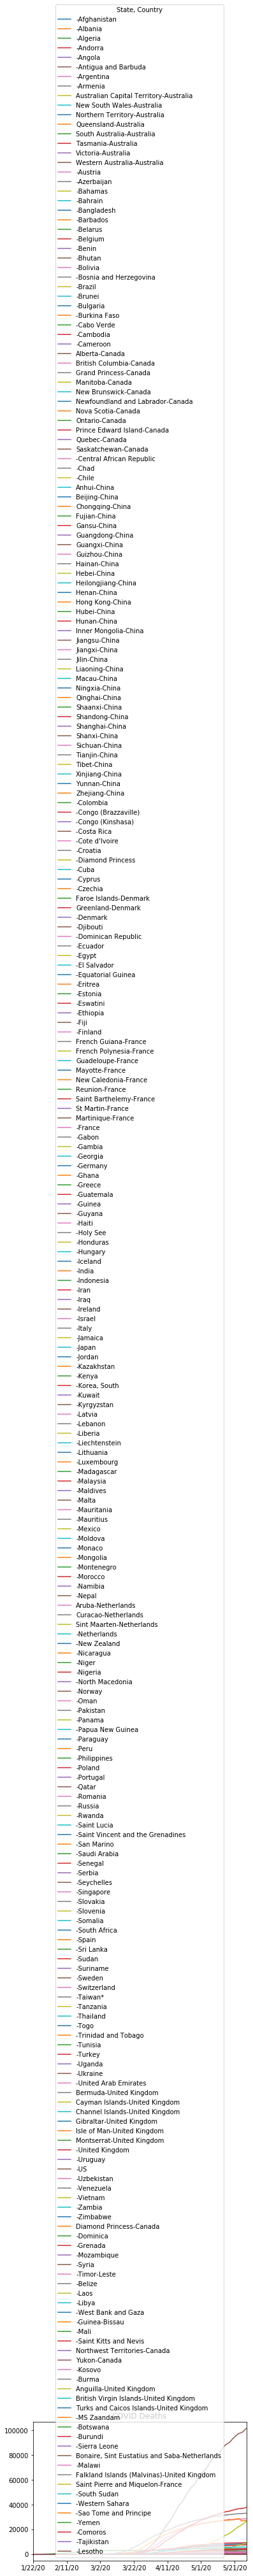

In [38]:
plt.figure(figsize=(12,6))
iter_death_df.plot(title="COVID Deaths")

In [39]:
print(iter_death_df.index)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)


In [41]:
test_changing_index = iter_death_df
test_changing_index.index.astype('datetime64[ns]')

TypeError: Cannot cast Index to dtype datetime64[ns]

In [49]:
(test_changing_index.index).apply(lambda x: pd.to_datetime(d))

AttributeError: 'Index' object has no attribute 'apply'

In [44]:
idx = test_changing_index.index

In [45]:
print(idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20',
       '5/25/20', '5/26/20', '5/27/20', '5/28/20'],
      dtype='object', length=128)


In [46]:
type(idx)

pandas.core.indexes.base.Index

In [64]:
ts_length = len(idx)
idx[0]
print(ts_length)
type(idx[0])
iter_idx = pd.Series(idx)

128


In [65]:
test = pd.to_datetime(iter_idx)

In [67]:
print(test)
type(test)

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
5     2020-01-27
6     2020-01-28
7     2020-01-29
8     2020-01-30
9     2020-01-31
10    2020-02-01
11    2020-02-02
12    2020-02-03
13    2020-02-04
14    2020-02-05
15    2020-02-06
16    2020-02-07
17    2020-02-08
18    2020-02-09
19    2020-02-10
20    2020-02-11
21    2020-02-12
22    2020-02-13
23    2020-02-14
24    2020-02-15
25    2020-02-16
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
         ...    
98    2020-04-29
99    2020-04-30
100   2020-05-01
101   2020-05-02
102   2020-05-03
103   2020-05-04
104   2020-05-05
105   2020-05-06
106   2020-05-07
107   2020-05-08
108   2020-05-09
109   2020-05-10
110   2020-05-11
111   2020-05-12
112   2020-05-13
113   2020-05-14
114   2020-05-15
115   2020-05-16
116   2020-05-17
117   2020-05-18
118   2020-05-19
119   2020-05-20
120   2020-05-21
121   2020-05-22
122   2020-05-23
123   2020-05-24
124   2020-05-25
125   2020-05-

pandas.core.series.Series

In [68]:
iter_death_df.index = test

In [70]:
iter_death_df.head()
print(iter_death_df.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', length=128, freq=None)


In [71]:
def series_to_json_obj(ts):
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

json_obj = series_to_json_obj(iter_death_df)

In [72]:
print(json_obj)

{'start': '2020-01-22 00:00:00', 'target': ['-Afghanistan', '-Albania', '-Algeria', '-Andorra', '-Angola', '-Antigua and Barbuda', '-Argentina', '-Armenia', 'Australian Capital Territory-Australia', 'New South Wales-Australia', 'Northern Territory-Australia', 'Queensland-Australia', 'South Australia-Australia', 'Tasmania-Australia', 'Victoria-Australia', 'Western Australia-Australia', '-Austria', '-Azerbaijan', '-Bahamas', '-Bahrain', '-Bangladesh', '-Barbados', '-Belarus', '-Belgium', '-Benin', '-Bhutan', '-Bolivia', '-Bosnia and Herzegovina', '-Brazil', '-Brunei', '-Bulgaria', '-Burkina Faso', '-Cabo Verde', '-Cambodia', '-Cameroon', 'Alberta-Canada', 'British Columbia-Canada', 'Grand Princess-Canada', 'Manitoba-Canada', 'New Brunswick-Canada', 'Newfoundland and Labrador-Canada', 'Nova Scotia-Canada', 'Ontario-Canada', 'Prince Edward Island-Canada', 'Quebec-Canada', 'Saskatchewan-Canada', '-Central African Republic', '-Chad', '-Chile', 'Anhui-China', 'Beijing-China', 'Chongqing-China

In [80]:
iter_death_df.head()
iter_death_df.columns
iter_death_df['-Afghanistan'].tolist()
#print(type(iter_death_df['-Afghanistan']))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 6.0,
 6.0,
 7.0,
 7.0,
 11.0,
 14.0,
 14.0,
 15.0,
 15.0,
 18.0,
 18.0,
 21.0,
 23.0,
 25.0,
 30.0,
 30.0,
 30.0,
 33.0,
 36.0,
 36.0,
 40.0,
 42.0,
 43.0,
 47.0,
 50.0,
 57.0,
 58.0,
 60.0,
 64.0,
 68.0,
 72.0,
 85.0,
 90.0,
 95.0,
 104.0,
 106.0,
 109.0,
 115.0,
 120.0,
 122.0,
 127.0,
 132.0,
 136.0,
 153.0,
 168.0,
 169.0,
 173.0,
 178.0,
 187.0,
 193.0,
 205.0,
 216.0,
 218.0,
 219.0,
 220.0,
 227.0,
 235.0]

In [81]:
iter_death_df.columns

Index(['-Afghanistan', '-Albania', '-Algeria', '-Andorra', '-Angola',
       '-Antigua and Barbuda', '-Argentina', '-Armenia',
       'Australian Capital Territory-Australia', 'New South Wales-Australia',
       ...
       '-Malawi', 'Falkland Islands (Malvinas)-United Kingdom',
       'Saint Pierre and Miquelon-France', '-South Sudan', '-Western Sahara',
       '-Sao Tome and Principe', '-Yemen', '-Comoros', '-Tajikistan',
       '-Lesotho'],
      dtype='object', name='State, Country', length=266)

In [82]:
len(iter_death_df.columns)

266

In [85]:
col = iter_death_df.columns
list_of_json_obj = []

for i in col:
    deaths = iter_death_df[i]
    files = series_to_json_obj(deaths)
    list_of_json_obj.append(files)

In [86]:
len(list_of_json_obj)

266

In [87]:
list_of_json_obj[1]

{'start': '2020-01-22 00:00:00',
 'target': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  4.0,
  5.0,
  5.0,
  6.0,
  8.0,
  10.0,
  10.0,
  11.0,
  15.0,
  15.0,
  16.0,
  17.0,
  20.0,
  20.0,
  21.0,
  22.0,
  22.0,
  23.0,
  23.0,
  23.0,
  23.0,
  23.0,
  24.0,
  25.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  27.0,
  27.0,
  27.0,
  27.0,
  28.0,
  28.0,
  30.0,
  30.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,
  32.0,
  32.0,
  33.0,
  33.0,
  33.0]

In [88]:
import json
import os

def write_json_dataset(time_series, filename):
    with open(filename, 'wb') as f:
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

In [89]:
data_dir = 'capstone_covid_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [98]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

write_json_dataset(time_series_training, train_key)
write_json_dataset(iter_death_df, test_key)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [91]:
def create_training_series(complete_time_series, prediction_length):
    time_series_training = []
    for ts in complete_time_series:
        time_series_training.append(ts[:-prediction_length])
    return time_series_training


In [93]:
prediction_length = 7
time_series_training = create_training_series(iter_death_df, prediction_length)

In [94]:
type(time_series_training)

list

In [95]:
len(time_series_training)

266